<a href="https://colab.research.google.com/github/Sindhu291/water-quality-prediction/blob/main/Water_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# @title Default title text
df = pd.read_csv('/content/PB_All_2000_2021.csv', sep=';')  # Replace with your dataset file name

df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [ ]:
print(df.columns)
print(df.isnull().sum())
df.describe()


Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL'],
      dtype='object')
id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64


,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
std,6.084226,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000


In [ ]:
df = df.dropna()

# Define Features and Targets
# 🟩 INPUT columns (Example - change based on your dataset)
# Based on the dataset preview, the following columns are available:
# id, date, NH4, BSK5, Suspended, O2, NO3, NO2, SO4, PO4, CL
# Assuming 'id' and 'date' are not features, and the others are potential targets or features.
# You might want to select specific columns as features based on domain knowledge.
# As a starting point, I'll use 'Suspended' as a potential feature. You should adjust this based on your understanding of the data.
X = df[['Suspended']]  # Replace with actual sensor inputs

# 🟥 OUTPUT columns (pollutants to predict)
y = df[['NH4', 'NO3', 'NO2', 'O2', 'BSK5', 'PO4', 'CL', 'SO4']]  # Target pollutants

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
model = MultiOutputRegressor(rf)

# Train the Model
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: -0.20949436410530717
MSE: 19252.61350945674


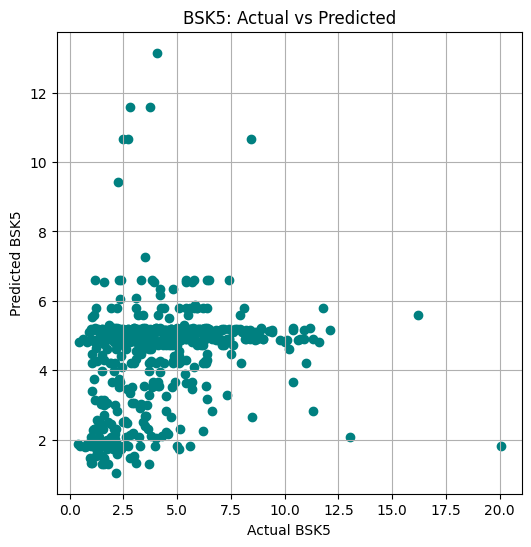

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test['BSK5'], y_pred[:, y.columns.get_loc('BSK5')], color='teal')
plt.xlabel("Actual BSK5")
plt.ylabel("Predicted BSK5")
plt.title("BSK5: Actual vs Predicted")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test['BSK5'], y_pred[:, y.columns.get_loc('BSK5')], color='teal')
plt.xlabel("Actual BSK5")
plt.ylabel("Predicted BSK5")
plt.title("BSK5: Actual vs Predicted")
plt.grid(True)
plt.show()


NH4 → R²: -0.186, MSE: 4.763
NO3 → R²: -0.151, MSE: 45.586
NO2 → R²: -0.555, MSE: 0.272
O2 → R²: -0.172, MSE: 17.290
BSK5 → R²: -0.023, MSE: 6.715
PO4 → R²: -0.303, MSE: 0.563
CL → R²: -0.130, MSE: 149181.308
SO4 → R²: -0.155, MSE: 4764.412


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 1 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   id;date;NH4;BSK5;Suspended;O2;NO3;NO2;SO4;PO4;CL  2861 non-null   object
dtypes: object(1)
memory usage: 22.5+ KB


In [ ]:
# rows and cols
df.shape

(2861, 1)

In [ ]:
# Statistics of the data
df.describe().T

,count,unique,top,freq
id;date;NH4;BSK5;Suspended;O2;NO3;NO2;SO4;PO4;CL,2861,2861,22;10.02.2021;0;1.78;0;14.3;6.3;0.033;134.4;0....,1


In [ ]:
# Missing values
df.isnull().sum()

,0
id;date;NH4;BSK5;Suspended;O2;NO3;NO2;SO4;PO4;CL,0


In [ ]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# Drop rows with missing values
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2776 non-null   int64         
 1   date       2776 non-null   datetime64[ns]
 2   NH4        2776 non-null   float64       
 3   BSK5       2776 non-null   float64       
 4   Suspended  2776 non-null   float64       
 5   O2         2776 non-null   float64       
 6   NO3        2776 non-null   float64       
 7   NO2        2776 non-null   float64       
 8   SO4        2776 non-null   float64       
 9   PO4        2776 non-null   float64       
 10  CL         2776 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 260.2 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2776 non-null   int64         
 1   date       2776 non-null   datetime64[ns]
 2   NH4        2776 non-null   float64       
 3   BSK5       2776 non-null   float64       
 4   Suspended  2776 non-null   float64       
 5   O2         2776 non-null   float64       
 6   NO3        2776 non-null   float64       
 7   NO2        2776 non-null   float64       
 8   SO4        2776 non-null   float64       
 9   PO4        2776 non-null   float64       
 10  CL         2776 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 260.2 KB


In [ ]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


In [ ]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [ ]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [ ]:
pollutants = ['NH4', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

In [ ]:
df = df.dropna(subset=pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [ ]:
df.isnull().sum()

,0
id,0
date,0
NH4,0
BSK5,0
Suspended,0
O2,0
NO3,0
NO2,0
SO4,0
PO4,0


In [ ]:
# Feature and target selection - Feature - independent variable and Target dependent variable
X = df[['id', 'year']]
y = df[pollutants]

In [ ]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [ ]:
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [ ]:
# Train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [ ]:
# Evaluate model
y_pred = model.predict(X_test)

In [ ]:
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
O2:
   MSE: 13.955930601011778
   R2: 0.05381534726017545

NO3:
   MSE: 20.40490374797047
   R2: 0.484569230962687

NO2:
   MSE: 10.343405404494533
   R2: -58.203860061465534

SO4:
   MSE: 2275.807351900022
   R2: 0.44815941114800695

PO4:
   MSE: 0.24389334027446746
   R2: 0.43586964570072984

CL:
   MSE: 32661.43741785968
   R2: 0.7526035914013255



In [ ]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  O2: 13.25
  NO3: 6.93
  NO2: 0.07
  SO4: 144.84
  PO4: 0.46
  CL: 67.36


In [ ]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')


Model and cols structure are saved!


In [ ]:
import joblib
joblib.dump(model, 'water_quality_model.pkl')



['water_quality_model.pkl']

In [ ]:
loaded_model = joblib.load('water_quality_model.pkl')

In [ ]:
loaded_predictions = loaded_model.predict(X_test)

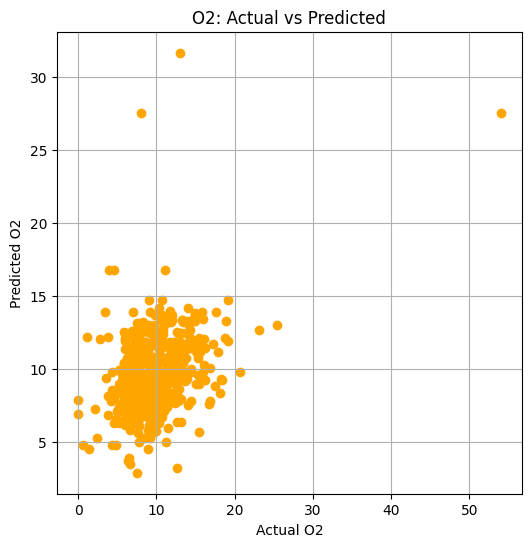

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test['O2'], loaded_predictions[:, y_test.columns.get_loc('O2')], color='orange')
plt.xlabel("Actual O2")
plt.ylabel("Predicted O2")
plt.title("O2: Actual vs Predicted")
plt.grid(True)
plt.show()

In [ ]:
feature_importances = loaded_model.estimators_[0].feature_importances_
features = X_train.columns


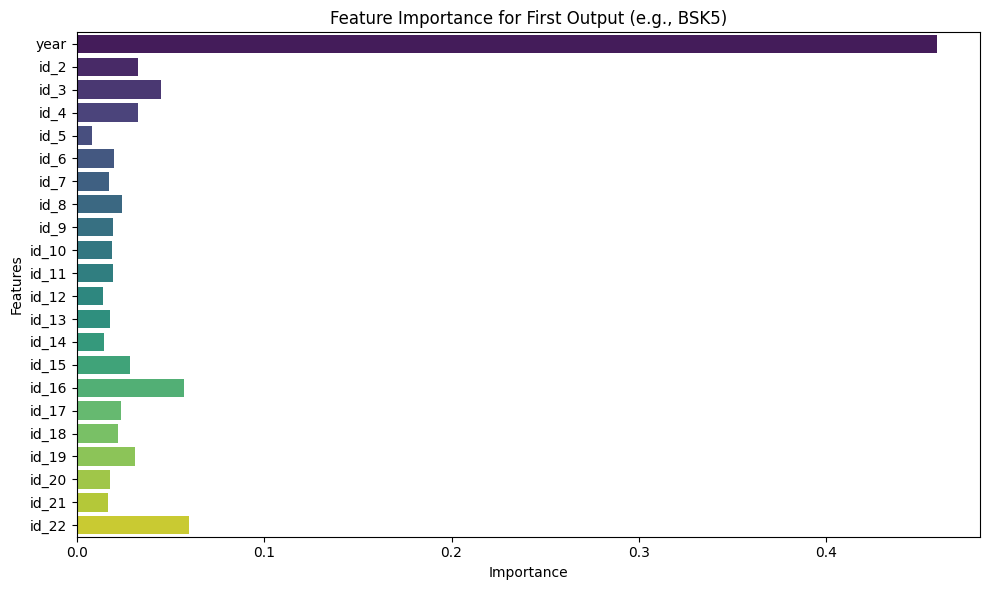

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Feature Importance for First Output (e.g., BSK5)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.3 MB/s eta 0:00:00


### **Deployment**

In [ ]:
import pandas as pd
import numpy as np
import joblib
import pickle
import streamlit as st

**Load the model and structure**

In [ ]:
model = joblib.load("pollution_model.pkl")
model_cols = joblib.load("model_columns.pkl")

In [ ]:
st.title("Water Pollutants Predictor")
st.write("Predict the water pollutants based on Year and StationID")

In [ ]:
year_input = st.number_input("enter year",min_value=2000,max_value=2100,value=2022)
station_id = st.text_input("Enter statioin ID",value='1')

**To Encode and then** **Predict**

In [ ]:
if st.button('Predict'):
  if not station_id:
    st.warning('Please enter the station ID')
  else:
    #prepare the input
    input_df = pd.DataFrame({'Year': [year_input], 'id':[station_id]})
    input_encoded = pd.get_dummies(input_df,columns=['id'])

    #Align with model cols
    for col in model_cols:
      if col not in input_encoded.columns:
        input_encoded[col] = 0
    input_encoded = input_encoded[model_cols]

    #Predict
    predicted_pollutants = model.predict(input_encoded)[0]
    polluntants = ['O2','NO3','NO2','SO4','PO4','CL']

    st .subheader(f"Predicted pollutant levels for the station '{station_id}' in {year_input}:")
    predicted_values = {}
    for p,val in zip(pollutants, predicted_pollutants):
      st.write(f'{p}:{val:.2f}')